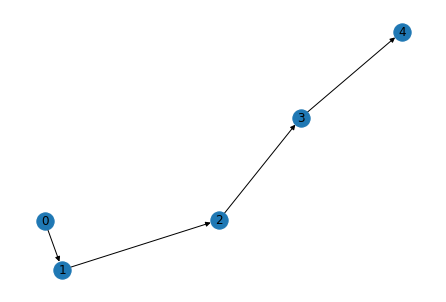

----------------------Aproxx Final Rank vector--------------------------

[1000, 1798, 2424, 2955, 3349]
OUTDEGREE [1.0, 1.0, 1.0, 1.0, 0.0]
INDEGREE [0.0, 1.0, 1.0, 1.0, 1.0]
[12, 0, 0, 0, 0]
[0, 0, 0, 0, 0]


In [ ]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import operator
import math
from decimal import Decimal

# graph 
g = nx.path_graph(5, create_using=nx.DiGraph())

nodes=[i for i in g.nodes()]

nx.draw(g,with_labels=True)
plt.draw()
plt.show()

matrix=nx.to_numpy_matrix(g)
trans_matrix= matrix.transpose()
matrix=matrix.tolist()
trans_matrix=trans_matrix.tolist()


#number_of_simulations = int(input("enter number of simulations to be carried out:"))
number_of_simulations=1000
number_of_vertices = len(matrix)
Final_Rank_Vector = [0]*number_of_vertices
linkIDS = [i for i in range(number_of_vertices)]
linkIDS_len=[0] * number_of_vertices
outdegree_vec = [0]*number_of_vertices
indegree_vec=[0]*number_of_vertices
for i in range(number_of_vertices):
  outdegree_vec[i]=sum(matrix[i])
  indegree_vec[i]=sum(trans_matrix[i])
total_number_of_visits=0

def outlinks(lst):
  c=0
  lst1=[]
  for i in range(number_of_vertices):
    if lst[i]>0:
      c=c+1
      lst1.append(i)
  return c,lst1

for n in range(number_of_vertices):
  #linkIDS[n]=n                                                                                  
  for i in range(number_of_simulations):
      node_random=n                                                                         
      while(1):
        Final_Rank_Vector[node_random]=Final_Rank_Vector[node_random]+1
        linkIDS[node_random]=linkIDS[n]
        linkIDS_len[linkIDS[n]] +=1
                                                                                  
        total_number_of_visits=total_number_of_visits+1

        if random.random() <= 0.20:
          break
        else:
          number_of_outlinks,lst = outlinks(matrix[node_random])
        
          if number_of_outlinks > 0:
            node_random=random.choice([l for l in lst])
          else:
            break;
    
                                                                 

print("----------------------Aproxx Final Rank vector--------------------------\n")
print(Final_Rank_Vector)


for i in range(len(linkIDS_len)):
  linkIDS_len[i]=math.ceil((linkIDS_len[i])/number_of_simulations)
                                                                                  

print("OUTDEGREE",outdegree_vec)
print("INDEGREE",indegree_vec)
print(linkIDS_len)
print(linkIDS)

In [ ]:
print("Enter the # nodes you need to add")
choice=int(input())
curr=4
for i in range(choice):
  curr =curr + 1
  node=curr
  nodes.append(node)
  g.add_nodes_from(nodes)
  linkIDS_len.append(1)
  linkIDS.append(node)
  outdegree_vec.append(0)
  indegree_vec.append(0)

  indegree=random.randint(0,0)
  indegree_vec[node]=indegree
  aprox_visits=0
  dict_in = {}
# ------------------------------------------------------------------------------
  l=0
  for i in range(indegree):
    previous_source = -1;
    source = int(random.uniform(0,curr-1))
    while previous_source==source:
      source = int(random.uniform(0,curr-1))
    previous_source = source
    
    dict_in.update({source:1})
    g.add_edge(source,node)
    # if node link id is less than source we follow convention

    if linkIDS[node]<=linkIDS[source]:
      linkIDS_len[linkIDS[source]] += 1
    else:
      linkIDS_len[linkIDS[source]] +=1
      linkIDS[node]= linkIDS[source]
    
    length__1 = linkIDS_len[linkIDS[source]]
    temp = 1000* (0.8* ((1 - math.pow(0.80,length__1))/0.20))
    l= max(l,temp)
    aprox_visits = aprox_visits + ( math.ceil((1/outdegree_vec[source])*( 0.80 * Final_Rank_Vector[source] )))
   

  aprox_visits = aprox_visits + number_of_simulations + l

  total_number_of_visits = total_number_of_visits + aprox_visits
  Final_Rank_Vector.append(aprox_visits)
# ------------------------------------------------------------------------------
  


# ************************************************** Now Use Barbasi*****************************************

  m=3  #nuber of outlinks a node should add to m>1 and m < curr
  outdegree_vec[node]=m
  
  cum_prob=[]
  ratio_indegree=[]

  total_indegree_len=0
  for i in range(len(indegree_vec)-1):
    total_indegree_len = total_indegree_len +indegree_vec[i]
  
  for i in range(len(indegree_vec)-1):
    ratio_indegree.append(indegree_vec[i]/total_indegree_len)
  
  s=0
  for i in range(len(indegree_vec)-1):
    cum_prob.append(s+ratio_indegree[i])
    s = s+ratio_indegree[i]


  num_edges_added = 0
  target_nodes = []

  while (num_edges_added < m):
      prev_cum = 0
      r = random.random()
      k = 0
        
      while (not (r > prev_cum and r <= cum_prob[k])):
          prev_cum = cum_prob[k]
          k = k + 1
      target_node = k
      target=k
        
      if target_node in target_nodes:
          continue
        
      else:
          target_nodes.append(target_node)
      g.add_edge(node, target_node)
      indegree_vec[target_node]=indegree_vec[target_node]+1

      num_edges_added += 1

      # print(num_edges_added, ' edges added')


    # --------------------------------------------------------------------------

      if target in dict_in.keys():
        # print("hello")
        jst_a_temporary1 = Final_Rank_Vector[node]
        jst_a_temporary2 = Final_Rank_Vector[target]
        Final_Rank_Vector[node] = max(Final_Rank_Vector[node],Final_Rank_Vector[target])
        Final_Rank_Vector[target] = max(Final_Rank_Vector[node],Final_Rank_Vector[target])
        total_number_of_visits = total_number_of_visits + ( Final_Rank_Vector[node] - jst_a_temporary1 ) + ( Final_Rank_Vector[target] - jst_a_temporary2 ) 

    # --------------------------------------------------------------------------

      else:
        length__1 = linkIDS_len[linkIDS[target]]
        linkIDS_len[linkIDS[node]] += length__1

        if linkIDS[target]>linkIDS[node]:
          linkIDS[target] = linkIDS[node]

      
        temp = 1000* (0.8 * ((1 - math.pow(0.80,length__1))/0.20))
        
        val= math.ceil((1/outdegree_vec[node])*(0.80 * Final_Rank_Vector[node] ))
        Final_Rank_Vector[target] = Final_Rank_Vector[target] + val +temp
        total_number_of_visits= total_number_of_visits + val+ temp


  # ----------------------------------------------------------------------------
  # pos=nx.circular_layout(g)
  # nx.draw(g,pos,node_color='lightblue',with_labels=True)
  # plt.draw()
  # plt.show()

  # print("number of visits to each node::",Final_Rank_Vector)
  # print("linkIDS ::",linkIDS)
  # print("linkIDS_lenght",linkIDS_len)
  # print("outdegree::" ,outdegree_vec)
  # print("indegree::",indegree_vec)
  # print("total visits::::::::::",sum(Final_Rank_Vector))
  # print("total visits",total_number_of_visits)
  # x=[]
  # x=[(((i/(total_number_of_visits)))) for i in Final_Rank_Vector]
  # print("new proposed page rank->",x)
  # print(sum(x))

  # matrix=nx.to_numpy_matrix(g)
  # matrix=matrix.tolist()
  # print(matrix)


  # number_of_simulations=1000
  # number_of_vertices=len(matrix)
  # Approx_Rank_Vector=[0]*number_of_vertices
  # length_vec=[0]*number_of_vertices
  # total_number_of_visits1=0
  # def outlinks(lst):
  #   c=0
  #   lst1=[]
  #   for i in range(number_of_vertices):
  #     if lst[i]!=0:
  #       c=c+1
  #       lst1.append(i)
  #   return c,lst1
  
  
  # for n in range(number_of_vertices):
  #   for i in range(number_of_simulations):
  #     node_random=n
  #     while(1):
  #       Approx_Rank_Vector[node_random]=Approx_Rank_Vector[node_random]+1
  #       length_vec[n]=length_vec[n]+1
  #       total_number_of_visits1=total_number_of_visits1+1
  #       termination_prob = random.uniform(0,1)
  #       if termination_prob <= 0.20:
  #         break
  #       else:
  #         number_of_outlinks,lst = outlinks(matrix[node_random])
        
  #         if number_of_outlinks > 0:
  #           for l in lst:
  #             if l==n:
  #               lst.remove(l)
  #           if len(lst) > 0:
  #             node_random=random.choice([l for l in lst])

  #         else:
  #           break;
      
        
  # final_Rank_Vector=[i for i in Approx_Rank_Vector]
  # print(final_Rank_Vector)
  # final_Rank_Vector=[(i/(total_number_of_visits1)) for i in final_Rank_Vector]
  # print("old proposed page rank->",final_Rank_Vector)
  # z=[int(i) for i in range(len(nodes))]
  # y1=final_Rank_Vector
  # y2=x
  # res=[]
  # for i in range(len(nodes)):
  #   res.append(y2[i]-y1[i])
  # fig = plt.figure(figsize=(10,2))
  # ax1 = fig.add_subplot(111)

  # ax1.scatter(z, y1, s=10, c='b',label="old")
  # #ax1.plot(x,y1)
  # ax1.scatter(z,y2, s=10, c='r', label="new-proposal")
  # #ax1.plot(y1,y2)
  # plt.legend(loc='best');
  # plt.vlines( z , y1, y2, colors = 'yellow',label = 'ERROR')
  # plt.show()
  
  # print("MAX::",max(res))
  # print("MIN::",min(res))
    



Enter the # nodes you need to add
1000


In [ ]:
# pos=nx.circular_layout(g)
# nx.draw(g,pos,node_color='lightblue',with_labels=True)
# plt.draw()
# plt.show()

print("number of visits to each node::",Final_Rank_Vector)
print("linkIDS ::",linkIDS)
print("linkIDS_lenght",linkIDS_len)
print("outdegree::" ,outdegree_vec)
print("indegree::",indegree_vec)
print("total visits::::::::::",sum(Final_Rank_Vector))
print("total visits",total_number_of_visits)
x=[]
x=[(((i/(total_number_of_visits)))) for i in Final_Rank_Vector]
print("new proposed page rank->",x)
print(sum(x))

number of visits to each node:: [1000, 3203479.918630895, 3136239.8430489455, 2997046.5697919903, 2650125.9476961303, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 

In [ ]:
matrix=nx.to_numpy_matrix(g)
matrix=matrix.tolist()
print(matrix)


number_of_simulations=1000
number_of_vertices=len(matrix)
Approx_Rank_Vector=[0]*number_of_vertices
length_vec=[0]*number_of_vertices
total_number_of_visits1=0
def outlinks(lst):
  c=0
  lst1=[]
  for i in range(number_of_vertices):
    if lst[i]!=0:
      c=c+1
      lst1.append(i)
  return c,lst1


for n in range(number_of_vertices):
  for i in range(number_of_simulations):
    node_random=n
    while(1):
      Approx_Rank_Vector[node_random]=Approx_Rank_Vector[node_random]+1
      length_vec[n]=length_vec[n]+1
      total_number_of_visits1=total_number_of_visits1+1
      termination_prob = random.uniform(0,1)
      if termination_prob <= 0.20:
        break
      else:
        number_of_outlinks,lst = outlinks(matrix[node_random])
      
        if number_of_outlinks > 0:
          for l in lst:
            if l==n:
              lst.remove(l)
          if len(lst) > 0:
            node_random=random.choice([l for l in lst])

        else:
          break;

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1000, 215736, 382727, 507221, 583520, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1

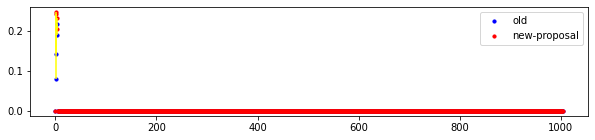

MAX:: 0.1664580791477247
MIN:: -0.012859600802791582


In [ ]:
final_Rank_Vector=[i for i in Approx_Rank_Vector]
print(final_Rank_Vector)
final_Rank_Vector=[(i/(total_number_of_visits1)) for i in final_Rank_Vector]
print("old proposed page rank->",final_Rank_Vector)
z=[int(i) for i in range(len(nodes))]
y1=final_Rank_Vector
y2=x
res=[]
for i in range(len(nodes)):
  res.append(y2[i]-y1[i])
fig = plt.figure(figsize=(10,2))
ax1 = fig.add_subplot(111)

ax1.scatter(z, y1, s=10, c='b',label="old")
#ax1.plot(x,y1)
ax1.scatter(z,y2, s=10, c='r', label="new-proposal")
#ax1.plot(y1,y2)
plt.legend(loc='best');
plt.vlines( z , y1, y2, colors = 'yellow',label = 'ERROR')
plt.show()

print("MAX::",max(res))
print("MIN::",min(res))

In [ ]:
nx.write_edgelist(g, "barbasi_weighted_test_edgelist500.txt", delimiter=' ', data=['weight'])

[0.0, 664.0, 751.0, 786.0, 803.0]
[1001, 1, 1, 1, 1]


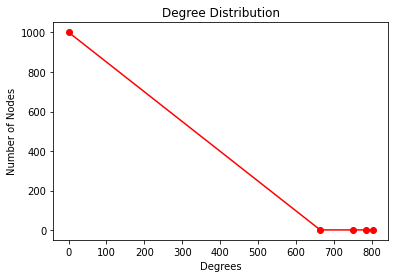

In [ ]:
def plot_deg_dist(g,indegree_vec):
    
    unique_degrees = list(set(indegree_vec))
    unique_degrees.sort()
    count_of_degrees = []
  
    for i in unique_degrees:
        c = indegree_vec.count(i)
        count_of_degrees.append(c)
  
    print(unique_degrees)
    print(count_of_degrees)
  
    plt.plot(unique_degrees, count_of_degrees, 'ro-')
    plt.xlabel('Degrees')
    plt.ylabel('Number of Nodes')
    plt.title('Degree Distribution')
    plt.show()
  
plot_deg_dist(g,indegree_vec)